# Autocorrelation of Signal as 3nt Periodicity Score

Using an autocorrelation of the frame bias signal to produce a metric of triplet periodicity strength 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from RiboMetric.modules import metagene_profile

In [3]:
def autocorrelation(signal: np.array, lag: int) -> float:
    """
    Computes the autocorrelation of a signal at a given lag.

    Parameters:
    -----------
    signal: np.array
        The signal to compute the autocorrelation of.

    lag: int
        The lag to compute the autocorrelation at.

    Returns:
    --------
    correlation_score: float
        The autocorrelation score at the given lag.
    """
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(signal)-1:].astype(float)
    autocorr /= autocorr[0]
    return autocorr[lag]

Dummy example to test autocorrelation

In [4]:
signal = np.array([0.5, 0.4, 0.2, 0.5, 0.5, 0.2, 0.5, 0.5, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2])
print(autocorrelation(signal, 3))

0.9626666666666667


In [5]:
df = pd.read_csv('/home/jack/projects/RibosomeProfiler/sample_data/annotated_read_df.csv')

In [ ]:
df_cleaned = df.drop(['sequence', 'sequence_qualities', 'tags', 'genomic_cds_starts', 'genomic_cds_ends'], axis=1)

In [ ]:
df_cleaned.to_csv('/home/jack/projects/RibosomeProfiler/sample_data/annotated_read_df_cleaned.csv', index=False)

In [ ]:
def prepare_metagene(metagene_profile: dict) -> dict:
    """
    Prepares a metagene profile for autocorrelation analysis.

    Parameters:
    -----------
    metagene_profile: dict
        The metagene profile to prepare.

    Returns:    
    --------    
    metagene_profile: dict
        The prepared metagene profile.
    """
    for read_length in metagene_profile:
        # ensure that the signal starts in frame 
        for position in sorted(metagene_profile[read_length].keys()):
            if position % 3 != 0:
                del metagene_profile[read_length][position]
            else: 
                break

        # ensure that 0 counts are added 
        for position in range(
            min(metagene_profile[read_length].keys()),
            max(metagene_profile[read_length].keys())
            ):
            if position not in metagene_profile[read_length]:
                metagene_profile[read_length][position] = 0
    return metagene_profile

In [ ]:
def autocorrelate_counts(metagene_profile: dict, lag: int) -> dict:
    """
    Computes the autocorrelation of the ribosome counts at a given lag.

    Parameters:
    -----------
    metagene_profile: dict
        The metagene profile to compute the autocorrelation of.

    lag: int
        The lag to compute the autocorrelation at.

    Returns:
    --------
    read_length_scores: dict
        The autocorrelation scores at the given lag.
    """
    read_length_scores = {}
    for read_length in metagene_profile:
        count_list = np.array(list(metagene_profile[read_length].values()))
        if count_list[0] != None:
            read_length_scores[read_length] = autocorrelation(count_list, lag)
        else:
            read_length_scores[read_length] = 0
    return read_length_scores
    

In [ ]:
autocorrelate_counts(
    prepare_metagene(
        metagene_profile(df_cleaned)['start']
    ), 3)

In [ ]:
def autocorrelate_proportions(metagene_profile: dict, lag: int) -> dict:
    """
    Computes the autocorrelation of the proportions of signal at a given lag.

    Parameters:
    -----------
    metagene_profile: dict
        The metagene profile to compute the autocorrelation of.

    lag: int
        The lag to compute the autocorrelation at.

    Returns:
    --------
    read_length_scores: dict
        The autocorrelation scores at the given lag.
    """
    read_length_scores = {}
    for read_length in metagene_profile:
        count_list = np.array(list(metagene_profile[read_length].values()))
        signal = []
        for i in range(0, len(count_list), 3):
            if len(count_list[i:i+3]) != 3:
                break

            for j in count_list[i:i+3]:
                signal.append(j/sum(count_list[i:i+3]))

        if signal != []:
            read_length_scores[read_length] = autocorrelation(signal, lag)
        else:
            read_length_scores[read_length] = 0
    return read_length_scores

In [ ]:
autocorrelate_proportions(
    prepare_metagene(
        metagene_profile(df_cleaned)['start']
    ), 3)

[12.08227195 10.53018077 10.61337212 10.56787753 10.60007417 10.40714818
 10.28545588 10.21988313 10.27841746  9.92548499  9.83538668  9.66331393
  9.62865058  9.46779536  9.44356867  9.3232278   9.2203366   9.12867579
  8.98846174  8.82375673  8.83577035  8.60535628  8.7782181   8.28586012
  8.26581308  8.18673228  8.24746485  8.01876425  7.76523486  7.8737398
  7.69515358  7.5821767   7.33674234  7.34924266  7.39702168  7.04871782
  6.96560693  6.88699533  6.85988159  6.63397485  6.45543358  6.45053511
  6.41670408  6.27301837  6.0562386   5.89351033  5.85598262  5.81545833
  5.7691179   5.63531458  5.33084285  5.31658058  5.28742562  5.07728722
  4.91132877  4.91080105  4.8884541   4.63741535  4.47338907  4.50825648
  4.43761986  4.11908294  4.0509056   4.14961852  3.79036456  3.7909566
  3.55905447  3.56584786  3.49426923  3.32373874  3.21282669  3.17334555
  2.94506078  2.85456666  2.78240261  2.61640273  2.57976803  2.47545865
  2.29173442  2.31596317  2.0299306   1.98714749  1.9

/tmp/ipykernel_186221/963545500.py:27: RuntimeWarning: invalid value encountered in scalar divide
  signal.append(j/sum(count_list[i:i+3]))


{15: 0.8746597964558264,
 16: 0.8730462690265176,
 17: 0.8637498753156941,
 18: 0.8728539239733485,
 19: 0.8708484385794003,
 20: 0.8366699461837667,
 21: 0.8394732222804774,
 22: 0.8216214592693023,
 23: 0.8413992249124905,
 24: 0.8760556069817478,
 25: 0.9245792780949037,
 26: 0.9323344881746731,
 27: 0.9424904134539189,
 28: 0.9348079157919748,
 29: 0.9113405057023648,
 30: 0.8328613353333786,
 31: 0.6256317900135763,
 32: 0.6899967753815841,
 33: nan,
 34: nan,
 35: nan,
 36: nan,
 37: nan,
 38: nan,
 39: nan,
 40: nan,
 41: nan,
 42: nan,
 43: nan,
 44: nan,
 45: nan,
 46: nan,
 47: nan,
 50: 0.86900178973574,
 48: 0,
 49: 0}

In [ ]:
metagene_prof = metagene_profile(df_cleaned)['start']
for read_length in metagene_prof:
    count_list = np.array(list(metagene_prof[read_length].values()))
    signal = []
    for i in range(0, len(count_list), 3):
        if len(count_list[i:i+3]) != 3:
            break
        for j in count_list[i:i+3]:
            signal.append(j/sum(count_list[i:i+3]))
    if read_length == 28:
        twenty_eight = signal
        twenty_eight_counts = count_list

    if read_length == 29:
        twenty_nine = signal
        twenty_nine_counts = count_list

    if read_length == 31:
        thirty_one = signal
        thirty_one_counts = count_list
print(twenty_eight[:-3])
print(twenty_eight[3:])

[0.7272727272727273, 0.1570909090909091, 0.11563636363636363, 0.3287981859410431, 0.41496598639455784, 0.2562358276643991, 0.2603938730853392, 0.3413566739606127, 0.3982494529540481, 0.25106990014265335, 0.35805991440798857, 0.3908701854493581, 0.34915254237288135, 0.2627118644067797, 0.38813559322033897, 0.415748031496063, 0.30708661417322836, 0.27716535433070866, 0.34102141680395387, 0.3525535420098847, 0.30642504118616143, 0.3772455089820359, 0.25948103792415167, 0.36327345309381237, 0.4332688588007737, 0.26305609284332687, 0.3036750483558994, 0.2171945701357466, 0.33182503770739064, 0.45098039215686275, 0.3859223300970874, 0.2682038834951456, 0.345873786407767, 0.3177710843373494, 0.3493975903614458, 0.3328313253012048, 0.3247232472324723, 0.3339483394833948, 0.3413284132841328, 0.26540284360189575, 0.5011848341232228, 0.2334123222748815, 0.3236111111111111, 0.25416666666666665, 0.4222222222222222, 0.32105868814729577, 0.3383199079401611, 0.34062140391254314, 0.3742603550295858, 0.

{}


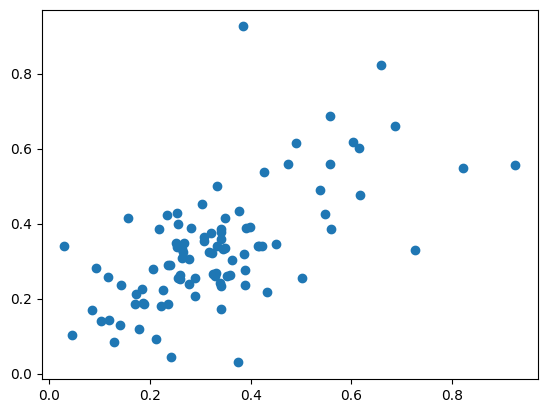

In [ ]:
# plot twenty_eight[:-3] vs twenty_eight[3:]
plt.plot(twenty_eight[:-3], twenty_eight[3:], 'o')
print(autocorrelate_proportions(signal, 3))

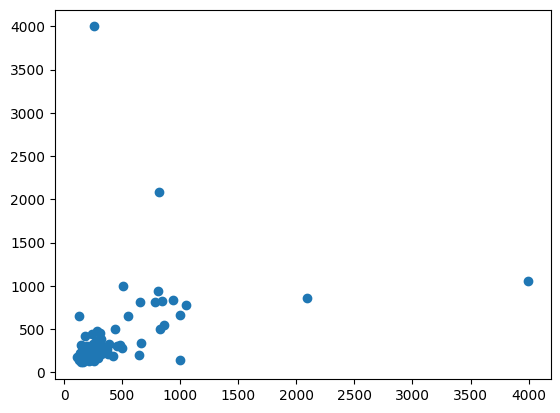

In [ ]:
plt.plot(twenty_eight_counts[:-3], twenty_eight_counts[3:], 'o')

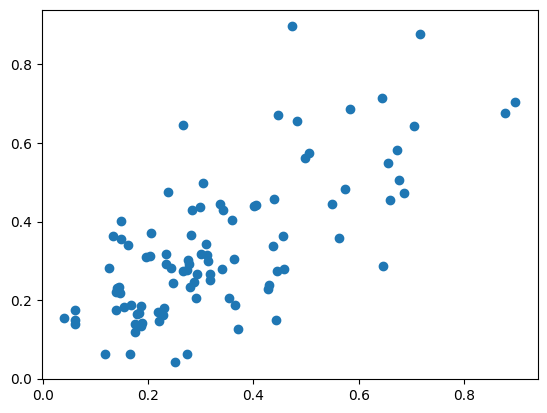

In [ ]:
plt.plot(twenty_nine[:-3], twenty_nine[3:], 'o')

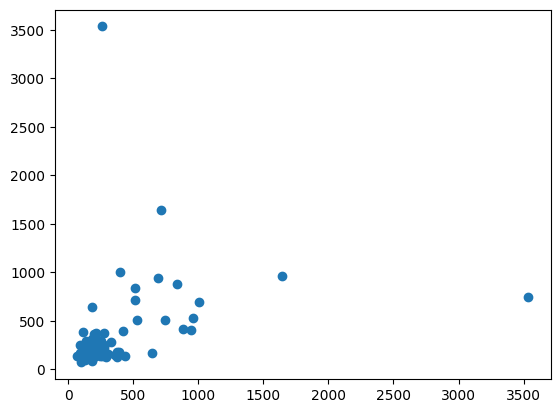

In [ ]:
plt.plot(twenty_nine_counts[:-3], twenty_nine_counts[3:], 'o')

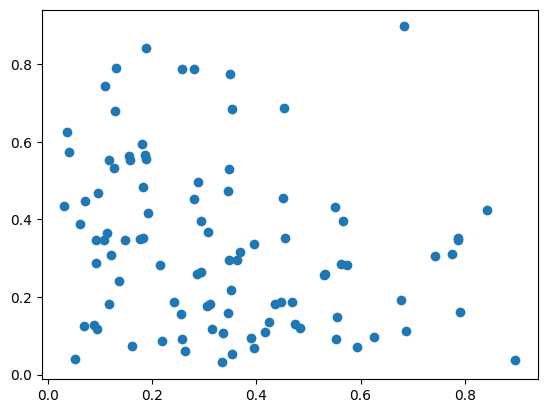

In [ ]:
plt.plot(thirty_one[:-3], thirty_one[3:], 'o')

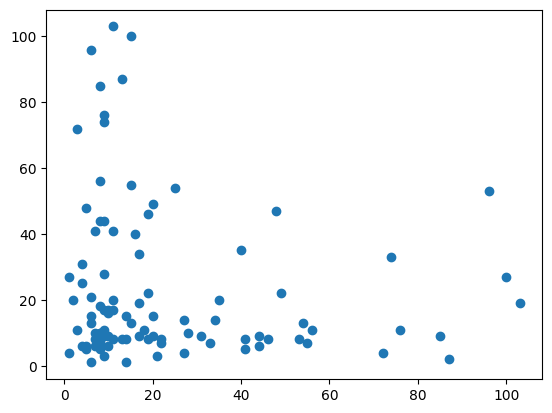

In [ ]:
plt.plot(thirty_one_counts[:-3], thirty_one_counts[3:], 'o')

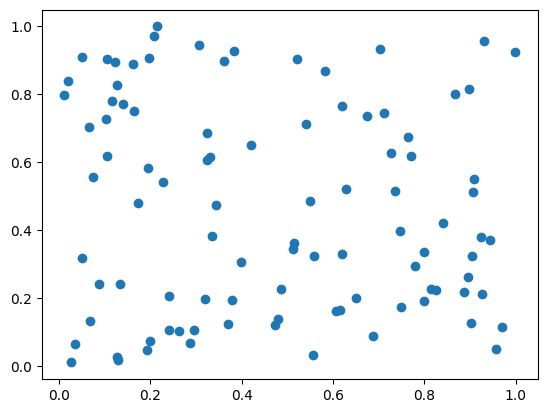

In [ ]:
# generate a list of random numbers and plot [:-3] vs [3:]
random = np.random.rand(len(twenty_eight))
plt.plot(random[:-3], random[3:], 'o')

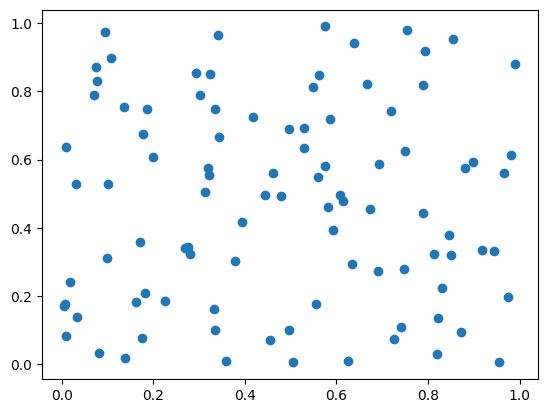

In [ ]:
# generate a list with ~ uniform distribution and plot [:-3] vs [3:]
uniform = np.random.uniform(0, 1, len(twenty_eight))
plt.plot(uniform[:-3], uniform[3:], 'o')

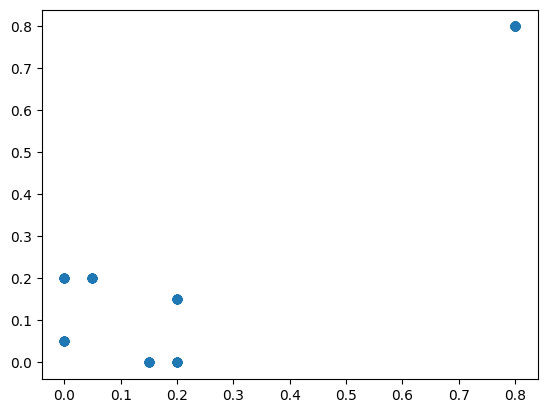

In [ ]:
perfect_periodicity = np.array([0.05, 0.15, 0.8, 0.2, 0, 0.8, 0, 0.2, 0.8]*20)
plt.plot(perfect_periodicity[:-3], perfect_periodicity[3:], 'o')

In [ ]:
from RiboMetric.metrics import information_metric_cutoff, read_frame_distribution_information_content_metric
from RiboMetric.modules import read_frame_distribution

In [ ]:
pre_scores = read_frame_distribution_information_content_metric(
    read_frame_distribution(df_cleaned))

In [ ]:
information_metric_cutoff(pre_scores, 0.05)

{15: 0.031842475920494634,
 16: 0.031623150796755,
 17: 0.06239882247766948,
 26: 0.037826283671943586,
 27: 0.025117620224053137,
 28: 0.059309381091382916,
 29: 0.050746838266852355}